In [1]:
import pandas as pd
pd.set_option("max_columns",1000)

In [2]:
import sys
lib_dir = "../../libs/"
if lib_dir not in sys.path:
    sys.path.append(lib_dir)

In [3]:
import image_level_agg_features as img_f
import user_level_agg_features as usr_f

In [4]:
usr_f.avg_posts_per_day().head()

,early_day,late_day,early_night,late_night,day,night,whole_date
user_id,,,,,,,
1097967773,0.035714,0.174107,0.410714,0.638393,0.209821,1.049107,1.258929
11520833,0.133047,0.227468,0.231760,0.746781,0.360515,0.978541,1.339056
1223036636,0.157895,0.789474,1.000000,0.578947,0.947368,1.578947,2.526316
1224423305,0.000000,1.909091,0.818182,1.000000,1.909091,1.818182,3.727273
1249457735,0.000000,0.307692,0.461538,0.384615,0.307692,0.846154,1.153846


In [11]:
x = img_f.number_of_faces()

In [13]:
image_date = pd.read_pickle("../../data/Visual_well_being/image_data.pickle")

In [27]:
# over all the photos what is the average
image_date[["image_id","user_id"]]\
.merge(x,on="image_id",how="outer")\
.fillna(0)\
.groupby("user_id")\
.mean().head(2)

,number_of_face
user_id,
0,1.000000
1097967773,0.719858


In [28]:
#of the photos that have faces, what is the average
image_date[["image_id","user_id"]]\
.merge(x,on="image_id",how="inner")\
.fillna(0)\
.groupby("user_id")\
.mean().head(2)

,number_of_face
user_id,
1097967773,1.222892
11520833,1.701754


In [6]:
usr_f.average_number_of_faces_from_photos_with_faces().head()

,number_of_face
user_id,
1097967773,1.222892
11520833,1.701754
1223036636,1.461538
1224423305,1.000000
1249457735,1.500000


In [7]:
usr_f.average_number_of_faces_over_all_photos().head()

,number_of_face
user_id,
0,1.000000
1097967773,0.719858
11520833,0.621795
1223036636,0.395833
1224423305,0.024390


In [7]:
image_date = pd.read_pickle("../../data/Visual_well_being/image_data.pickle")

In [8]:
image_date.head(1)

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0


In [9]:
image_date.dtypes

image_id                   object
image_link                 object
image_url                  object
image_height              float64
image_width               float64
image_filter               object
image_posted_time_unix     object
image_posted_time          object
data_memorability         float64
user_id                    object
user_full_name             object
user_name                  object
user_website               object
user_profile_pic           object
user_bio                   object
user_followed_by          float64
user_follows              float64
user_posted_photos        float64
dtype: object

In [10]:
image_date.image_posted_time = pd.to_datetime(image_date.image_posted_time)

In [11]:
#df['Date_Time'].dt.dat
x = image_date[["image_posted_time","image_id","user_id"]].drop_duplicates()

xx = x.groupby([x.user_id,x.image_posted_time.dt.date])\
.count()\
.sort_values(by="image_id",ascending=False)




In [12]:
xxx = xx.groupby("user_id").mean()
xxx.head()

,image_posted_time,image_id
user_id,,
1097967773,1.258929,1.258929
11520833,1.339056,1.339056
1223036636,2.526316,2.526316
1224423305,3.727273,3.727273
1249457735,1.153846,1.153846


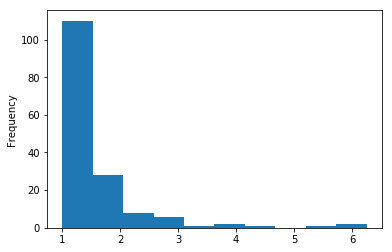

In [14]:
xxx.image_id.plot(kind="hist")

# time area counts 

In [17]:
x = image_date[["image_posted_time","image_id","user_id"]].drop_duplicates()
x.head(1)

,image_posted_time,image_id,user_id
0,2016-08-14 22:37:11,1316962883971761394_3468175004,3468175004


In [34]:
#df.index.isin(df.between_time('9:00', '17:00', include_start=True, include_end=True).index)

b = x.index.isin(x.set_index("image_posted_time").between_time('20:00', '23:00', include_start=True, include_end=True).index)

In [58]:
early_day_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('8:00', '12:00').index)
late_day_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('12:00', '20:00').index)
early_night_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('20:00', '00:00').index)
late_night_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('00:00', '8:00').index)


day_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('8:00', '20:00').index)
night_b = x.image_posted_time.isin(x.set_index("image_posted_time").between_time('20:00', '8:00').index)

In [82]:
import numpy as np
x["early_day"] = np.where(early_day_b, 1, 0)
x["late_day"] = np.where(late_day_b, 1, 0)
x["early_night"] = np.where(early_night_b, 1, 0)
x["late_night"] = np.where(late_night_b, 1, 0)

x["day"] = np.where(day_b, 1, 0)
x["night"] = np.where(night_b, 1, 0)
x["whole_date"] = 1

In [83]:
xx = x.drop(columns="image_id",axis=0)\
.groupby([x.user_id,x.image_posted_time.dt.date])\
.sum()

In [84]:
xx.head()

early_night  early_day  late_day  late_night  \
user_id    image_posted_time                                                 
1097967773 2014-01-11                   0          0         0           3   
           2014-01-12                   0          0         0           1   
           2014-04-11                   0          0         0           1   
           2014-05-11                   0          0         1           0   
           2014-05-12                   1          0         0           0   

                              night  day  whole_day  whole_date  
user_id    image_posted_time                                     
1097967773 2014-01-11             3    0          3           3  
           2014-01-12             1    0          1           1  
           2014-04-11             1    0          1           1  
           2014-05-11             0    1          1           1  
           2014-05-12             1    0          1           1

In [85]:
xxx = xx.groupby("user_id").mean()

In [86]:
xxx.head()

,early_night,early_day,late_day,late_night,night,day,whole_day,whole_date
user_id,,,,,,,,
1097967773,0.410714,0.035714,0.174107,0.638393,1.049107,0.209821,1.258929,1.258929
11520833,0.231760,0.133047,0.227468,0.746781,0.978541,0.360515,1.339056,1.339056
1223036636,1.000000,0.157895,0.789474,0.578947,1.578947,0.947368,2.526316,2.526316
1224423305,0.818182,0.000000,1.909091,1.000000,1.818182,1.909091,3.727273,3.727273
1249457735,0.461538,0.000000,0.307692,0.384615,0.846154,0.307692,1.153846,1.153846


# people

In [4]:
x = usr_f.ratio_of_topics()

In [5]:
x.head()

,Abyssinian,Accessories,Accordion,Adorable,Adventure,Aerial View,Affenpinscher,Afro Hairstyle,Aftershave,Agapanthus,Agaric,Aircraft,Airedale,Airmail,Airplane,Airship,Aisle,Albatross,Alcohol,Alcyonacea,Algae,Alley,Alleyway,Alligator,Alloy Wheel,Almond,Aloe,Alpaca,Alphabet,Alps,Altar,Aluminium,Amanita,Amaranthaceae,Amaryllis,Ambulance,American Flag,American Football,Amethyst,Ampersand,Amphibian,Amphitheater,Amphitheatre,Amusement Park,Analog Clock,Ancient Egypt,Anemone,Angora,Angus,Animal,Ankle,Anklet,Antelope,Antenna,Antique Car,Antler,Apartment,Apartment Building,Ape,Apiaceae,Apiary,Apparel,Apple,Apple Pie,Appliance,Applique,Apron,Aquarium,Aquatic,Aquilegia,Arabesque Pattern,Arachnid,Arch,Arch Bridge,Archer,Archery,Architecture,Arctic,Ardeidae,Arecaceae,Arena,Arm,Armor,Armory,Army,Art,Artichoke,Arugula,Asleep,Asparagus,Asphalt,Assembly Line,Aster,Asteraceae,Astronaut,Astronomy,Athlete,Atlas,Atv,Audience,Auditorium,Autograph,Automobile,Avocado,Awning,Azure Sky,Baboon,Baby,Back,Backpack,Backyard,Bacon,Badge,Bag,Bagel,Bagpipe,Bait,Bakery,Balcony,Ball,Ballerina,Ballet,Balloon,Ballroom,Bamboo,Bamboo Shoot,Banana,Banana Boat,Bandage,Bangles,Banister,Banner,Bar Counter,Bar Stool,Barbie,Barefoot,Barn,Barrel,Barrow,Bartender,Baseball,Baseball Cap,Baseball Field,Baseball Glove,Basket,Basketball,Basketball Court,Bassoon,Bat,Bathing Cap,Bathroom,Bathtub,Battleship,Bazaar,Bbq,Beach,Beach Wagon,Beacon,Bead,Bead Necklace,Beagle,Beak,Bean,Bean Sprout,Beanie,Bear,Beard,Beaver,Bed,Bedroom,Bee,Beer,Beer Bottle,Beer Glass,Bell Pepper,Bell Tower,Belt,Beluga Whale,Bench,Beverage,Bib,Bicycle,Bike,Bikini,Billboard,Billiard Room,Binoculars,Birch,Bird,Bird Feeder,Bird Nest,Birthday Cake,Biscuit,Bishop,Bison,Black Bear,Black Cat,Black Widow,Blackbird,Blackboard,Blade,Blanket,Blazer,Blender,Blimp,Bling,Blizzard,Blonde,Blossom,Blouse,Blueberry,Bmx,Boardwalk,Boat,Bomber,Bonfire,Bonnet,Bonsai,Book,Bookcase,Boot,Boston Bull,Bottle,Boutique,Bowl,Bowling,Bowling Ball,Box,Box Turtle,Boxer,Boxing,Boy,Bra,Brace,Bracelet,Braid,Brain Coral,Brass Section,Bread,Bread Loaf,Breakfast,Brewery,Brick,Bride,Bridegroom,Bridesmaid,Bridge,Broccoli,Brochure,Brooch,Broom,Brown Bear,Brownie,Brush,Bubble,Bucket,Bud,Buddha,Buffet,Buggy,Building,Bull,Bulldog,Bullfighter,Bullfighting,Bumblebee,Bumper,Bun,Bunker,Bunny,Burger,Burner,Burrito,Bus,Bush,Business Card,Bust,Butter,Butterfly,Cab,Cabbage,Cabin,Cable,Cable Car,Cactus,Cafe,Cafeteria,Cake,Calculator,Calendar,Calligraphy,Camera,Camouflage,Campfire,Camping,Can,Canal,Candle,Candy,Canine,Canned Goods,Cannon,Canoe,Canopy,Canvas,Canyon,Cap,Car,Car Dealership,Car Mirror,Car Seat,Car Show,Car Wheel,Cardboard,Cardigan,Cardinal,Carnation,Carnival,Carousel,Carp,Carpenter,Carpet,Carriage,Carrot,Carton,Cassette,Castle,Cat,Cathedral,Cattle,Cauliflower,Cave,Cell Phone,Cello,Chair,Chandelier,Cherry,Cherry Blossom,Chess,Chest,Chicken,Chihuahua,Child,Chime,Chocolate,Chow,Christmas Stocking,Church,Cinema,Circus,Citrus Fruit,City,Clam,Classroom,Cliff,Climbing,Clock,Clock Tower,Clogs,Closet,Clothing,Cloud,Clown,Club,Coast,Coat,Cobblestone,Cock Bird,Cockatoo,Cocker Spaniel,Cockroach,Cocktail,Coconut,Coffee Cup,Coffee Table,Coil,Coin,Coke,Collage,Collar,Collie,Colt Horse,Column,Comics,Compass,Computer,Computer Hardware,Computer Keyboard,Concert,Cone,Confectionery,Conference Room,Confetti,Conga,Conifer,Contact Lens,Convention Center,Convertible,Cooker,Cookie,Cooking Batter,Coral Reef,Cork,Corn,Cornbread,Corridor,Corset,Cosmetics,Cosmos,Cosplay,Costume,Cottage,Couch,Countryside,Coupe,Cow,Cowboy Boot,Cowboy Hat,Coyote,Cpu,Crab,Cracker,Cradle,Crane Bird,Crash Helmet,Crater,Crawling,Cream,Credit Card,Creek,Creme,Crest,Crib,Cricket Insect,Crocodile,Crocus,Croissant,Croquet,Cross,Cross Country,Crossword Puzzle,Crow,Crowd,Cruise Ship,Cruiser,Crystal,Ct Scan,Cucumber,Culinary,Cumulus,Cup,Cupboard,Cupcake,Curry,Curtain,Cushion,Custard,Cutlery,Cyclist,Daffodil,Dahlia,Dairy Cow,Daisies,Daisy,Dam,Dance,Dance Pose,Dandelion,Darts,Dawn,Debate,Deck,Deer,Denim,Deodora

In [6]:
cols = []
counts = []

for col in x.columns:
    not_zero = sum(x[col] != 0.0)
    cols.append(col)
    counts.append(not_zero)

In [7]:
topic_ranks = pd.DataFrame({"cols":cols,"not_zero_counts":counts}).sort_values("not_zero_counts",ascending=False)

In [8]:
b = topic_ranks.not_zero_counts > 40

In [9]:
topic_ranks[b].shape

(80, 2)

In [17]:
topic_ranks.to_excel("topics.xls")

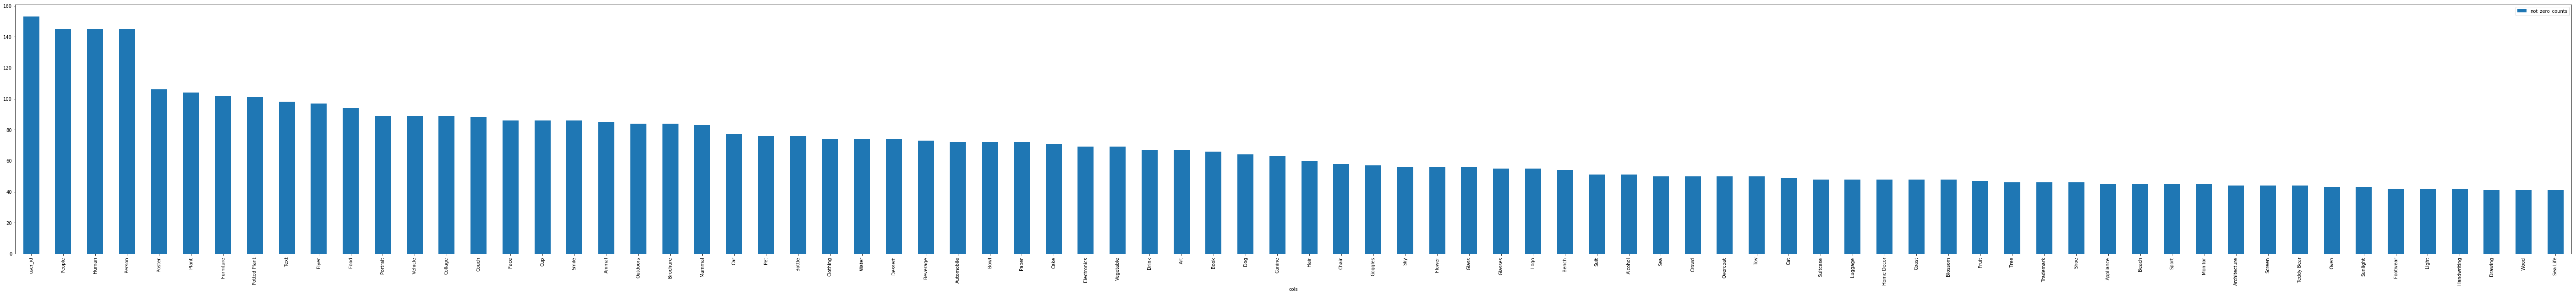

In [13]:
% matplotlib inline
topic_ranks[b].plot(kind="bar",x="cols",figsize=[100,10])

In [22]:
topics_considered = [
"user_id",
"Person",
"Plant",
"Food",
"Collage",
"Animal",
"Outdoors",
"Pet",
"Book",
"Dog",
"Canine",
"Sky",
"Alcohol",
"Crowd",
"Toy",
"Cat",
"Coast",
"Tree",
"Beach",
"Sport",
"Teddy Bear",
"Sunlight",
"Light",
"Drawing",
"Sea Life",
"TV",
"Dusk",
"Bikini",
"Sunrise",
"Sunset",
"Swimwear",
"Selfie",
"Beard",
"Woman",
"Cocktail",
"Pool",
"Performer",
"Coffee Cup",
"Tattoo",
"Downtown",
"Musical Instrument",
"Festival",
"City",
"Laptop",
"Pizza",
"Cloud",
"Beer Bottle",
"Money",
"Club",
"Airplane",
"Sketch",
"Sandwich",
"Cafeteria",
"Breakfast",
"Child"
]

In [23]:
x[topics_considered]

,user_id,Person,Plant,Food,Collage,Animal,Outdoors,Pet,Book,Dog,Canine,Sky,Alcohol,Crowd,Toy,Cat,Coast,Tree,Beach,Sport,Teddy Bear,Sunlight,Light,Drawing,Sea Life,TV,Dusk,Bikini,Sunrise,Sunset,Swimwear,Selfie,Beard,Woman,Cocktail,Pool,Performer,Coffee Cup,Tattoo,Downtown,Musical Instrument,Festival,City,Laptop,Pizza,Cloud,Beer Bottle,Money,Club,Airplane,Sketch,Sandwich,Cafeteria,Breakfast,Child
0,1097967773,0.712766,0.021277,0.056738,0.007092,0.000000,0.010638,0.000000,0.007092,0.000000,0.000000,0.003546,0.000000,0.000000,0.017730,0.000000,0.000000,0.000000,0.000000,0.000000,0.007092,0.003546,0.000000,0.000000,0.003546,0.003546,0.003546,0.000000,0.003546,0.003546,0.000000,0.003546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003546,0.000000,0.000000,0.000000,0.000000,0.000000,0.003546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010638,0.000000,0.003546,0.014184
1,11520833,0.346154,0.035256,0.012821,0.019231,0.054487,0.006410,0.028846,0.000000,0.022436,0.022436,0.003205,0.000000,0.000000,0.003205,0.006410,0.003205,0.003205,0.003205,0.003205,0.003205,0.000000,0.000000,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.000000,0.003205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003205,0.000000,0.006410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1223036636,0.187500,0.000000,0.020833,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1224423305,0.097561,0.073171,0.292683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1249457735,0.633333,0.066667,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
5,1308763259,0.349206,0.000000,0.111111,0.000000,0.000000,0.031746,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000,0.015873,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.000000
6,13745951,0.687500,0.043056,0.013889,0.022222,0.031944,0.012500,0.029167,0.002778,0.030556,0.030556,0.000000,0.006944,0.015278,0.008333,0.000000,0.002778,0.001389,0.002778,0.011111,0.008333,0.000000,0.000000,0.001389,0.001389,0.009722,0.000000,0.001389,0.000000,0.000000,0.001389,0.001389,0.002778,0.001389,0.002778,0.000000,0.001389,0.001389,0.001389,0.001389,0.000000,0.000000,0.001389,0.005556,0.000000,0.000000,0.002778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002778,0.002778
7,1414011473,0.290000,0.010000,0.010000,0.000000,0.080000,0.010000,0.050000,0.000000,0.040000,0.040000,0.020000,0

In [24]:
usr_f.average_number_of_faces_over_all_photos().head()

,number_of_face
user_id,
0,1.000000
1097967773,0.719858
11520833,0.621795
1223036636,0.395833
1224423305,0.024390


In [25]:
usr_f.average_number_of_faces_from_photos_with_faces()

,number_of_face
user_id,
1097967773,1.222892
11520833,1.701754
1223036636,1.461538
1224423305,1.000000
1249457735,1.500000
1308763259,1.923077
13745951,2.342920
1414011473,1.230769
1429720420,1.000000


In [26]:
usr_f.avg_posts_per_day().head(1)

,early_day,late_day,early_night,late_night,day,night,whole_date
user_id,,,,,,,
1097967773,0.035714,0.174107,0.410714,0.638393,0.209821,1.049107,1.258929


In [27]:
usr_f.average_engagement().head(1)

,user_id,avg_likes,avg_comments
0,1097967773,5.892473,0.731183
